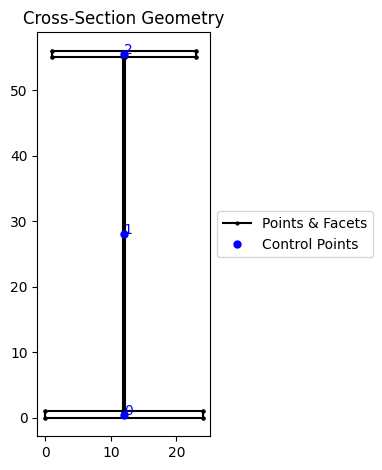

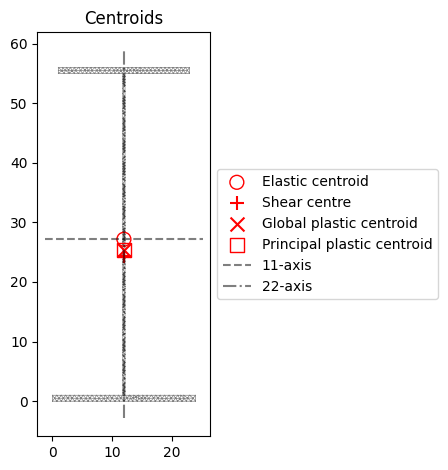

    Section Properties    
┏━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Property ┃       Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ A        │      66.250 │
│ Perim.   │     203.250 │
│ Qx       │    1800.000 │
│ Qy       │     795.000 │
│ cx       │      12.000 │
│ cy       │      27.170 │
│ Ixx_g    │   88572.083 │
│ Iyy_g    │   11579.571 │
│ Ixy_g    │   21600.000 │
│ Ixx_c    │   39666.423 │
│ Iyy_c    │    2039.571 │
│ Ixy_c    │      -0.000 │
│ Zxx+     │    1375.864 │
│ Zxx-     │    1459.945 │
│ Zyy+     │     169.964 │
│ Zyy-     │     169.964 │
│ rx       │      24.469 │
│ ry       │       5.549 │
│ phi      │       0.000 │
│ I11_c    │   39666.423 │
│ I22_c    │    2039.571 │
│ Z11+     │    1375.864 │
│ Z11-     │    1459.945 │
│ Z22+     │     169.964 │
│ Z22-     │     169.964 │
│ r11      │      24.469 │
│ r22      │       5.549 │
│ J        │      15.984 │
│ Iw       │ 1516229.821 │
│ x_se     │      12.000 │
│ y_se     │      24.432 │
│ x_st     │      12.000 │
│ y_st     │      24.432 │
│ x1_se    │       0.000 │
│ y2_se    │      -2.738 │
│ A_sx     │      38.157 │
│ A_sy     │      20.361 │
│ A_s11    │      38.157 │
│ A_s22    │      20.361 │
│ betax+   │      -6.778 │
│ betax-   │       6.778 │
│ betay+   │       0.000 │
│ betay-   │      -0.000 │
│ beta11+  │      -6.778 │
│ beta11-  │       6.778 │
│ beta22+  │       0.000 │
│ beta22-  │      -0.000 │
│ x_pc     │      12.000 │
│ y_pc     │      25.333 │
│ Sxx      │    1535.708 │
│ Syy      │     266.898 │
│ SF_xx+   │       1.116 │
│ SF_xx-   │       1.052 │
│ SF_yy+   │       1.570 │
│ SF_yy-   │       1.570 │
│ x11_pc   │      12.000 │
│ y22_pc   │      25.333 │
│ S11      │    1535.708 │
│ S22      │     266.898 │
│ SF_11+   │       1.116 │
│ SF_11-   │       1.052 │
│ SF_22+   │       1.570 │
│ SF_22-   │       1.570 │
└──────────┴─────────────┘

In [2]:
import xlwings as xw
import sectionproperties.pre.library.primitive_sections as sections
from sectionproperties.analysis.section import Section
import numpy as np
from datetime import datetime

if __name__ == "__main__":
    wb = xw.books.active
else:
    wb = xw.Book.caller()
    
sheet = wb.sheets['Plate Girders']

# Read the dimensions
bf_top = sheet.range("B1").value
tf_top = sheet.range("B2").value
hw = sheet.range("B3").value
tw = sheet.range("B4").value
bf_bot = sheet.range("B5").value
tf_bot = sheet.range("B6").value

#create plate sections
bot_flange = sections.rectangular_section(bf_bot, tf_bot)
web = sections.rectangular_section(tw, hw)
web = web.shift_section(x_offset = bf_bot / 2 - tw / 2, y_offset = tf_bot)
top_flange = sections.rectangular_section(bf_top, tf_top)
top_flange = top_flange.shift_section(x_offset = bf_bot / 2 - bf_top / 2, y_offset = tf_bot + hw)

#create geometry and plot
geometry = bot_flange + web + top_flange
geometry.plot_geometry()

#create mesh
geometry.create_mesh(mesh_sizes=[0.25, 0.25, 0.25])
section = Section(geometry)


#analyze
section.calculate_geometric_properties()
section.calculate_warping_properties()
section.calculate_plastic_properties()

#centroids
section.plot_centroids(filename="plot.png")
section.plot_centroids()

#results
#section.display_results(fmt='.3f')
results = np.array([["Ag",section.get_area()],
                    ["Qx",section.get_q()[0]],
                    ["Qy",section.get_q()[1]],
                    ["c top",tf_bot+hw+tf_top-section.get_c()[1]],
                    ["c bottom",section.get_c()[1]],
                    ["Ix",section.get_ic()[0]],
                    ["Iy",section.get_ic()[1]],
                    ["Sx top",section.get_z()[0]],
                    ["Sx bottom",section.get_z()[1]],
                    ["Sy", section.get_z()[2]],
                    ["rx", section.get_rc()[0]],
                    ["ry", section.get_rc()[1]],
                    ["J", section.get_j()],
                    ["Cw", section.get_gamma()],
                    ["Zx", section.get_s()[0]],
                    ["Zy", section.get_s()[1]],
                    ["yp top", tf_bot+hw+tf_top-section.get_pc()[1]],
                    ["yp bottom", section.get_pc()[1]]])

sheet.range("A21:B38").clear()
sheet.range("A21:B38").value = results

sheet.range("B20").clear()
now = datetime.now()
current_time = now.strftime("%Y-%m-%d %H:%M:%S")
sheet.range("B20").value = "Last Calculated " + current_time

section.display_results(fmt='.3f')


